# TCWV (1948–Present)

By: Ty Janoski

Updated: 11.24.2025

## Setup

In [56]:
# Imports

import matplotlib.pyplot as plt
import mplcyberpunk # noqa: F401
import xarray as xr
import numpy as np
import pandas as pd
import scipy.stats as stats
import pingouin as pg
import statsmodels.api as sm


plt.style.use("cyberpunk")
%config InlineBackend.figure_format = "svg"


## Load-in Data

In [ ]:
# coordinates for NYC
lat = 40.7128
lon = 286.065


def select_point(ds):
    return ds.sel(latitude=lat, longitude=lon, method="nearest")


tcwv_nyc = xr.open_mfdataset(
    "/mnt/drive2/ERA5/tcwv/*.nc",
    combine="by_coords",
    preprocess=select_point,
    chunks="auto",
)

tcwv_nyc = tcwv_nyc.tcwv.load()


## Resample

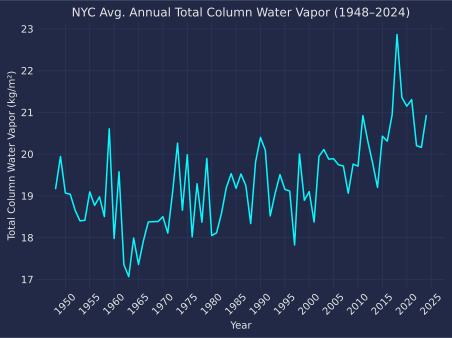

In [38]:
# Resample to annual means
tcwv_nyc_yearly = tcwv_nyc.resample(valid_time="1YS").mean()

fig = plt.figure()
tcwv_nyc_yearly.plot()
plt.ylabel("Total Column Water Vapor (kg/m²)")
plt.xlabel("Year")
plt.title("NYC Avg. Annual Total Column Water Vapor (1948–2024)")

# Set xticks to every 5 years
plt.xticks(
    np.arange(
        pd.to_datetime("1950-01-01"),
        pd.to_datetime("2026-01-01"),
        dtype="datetime64[Y]",
    )[::5],
    rotation=45,
)
plt.tight_layout()
plt.show()


In [62]:
x, y = np.arange(len(tcwv_nyc_yearly)), tcwv_nyc_yearly.values

model = sm.GLSAR(y, sm.add_constant(x), rho=1)
res = model.iterative_fit(maxiter=10)
print(res.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      y   R-squared:                       0.275
Model:                          GLSAR   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     28.02
Date:                Mon, 24 Nov 2025   Prob (F-statistic):           1.18e-06
Time:                        17:08:09   Log-Likelihood:                -89.348
No. Observations:                  76   AIC:                             182.7
Df Residuals:                      74   BIC:                             187.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.1227      0.259     70.052      0.0

In [63]:
# Compute monthly anomalies (removing the seasonal cycle)
tcwv_nyc_monthly = tcwv_nyc.resample(valid_time="1MS").mean()
tcwv_nyc_monthly_clim = tcwv_nyc_monthly.groupby("valid_time.month").mean("valid_time")
tcwv_nyc_monthly_anom = (
    tcwv_nyc_monthly.groupby("valid_time.month") - tcwv_nyc_monthly_clim
)


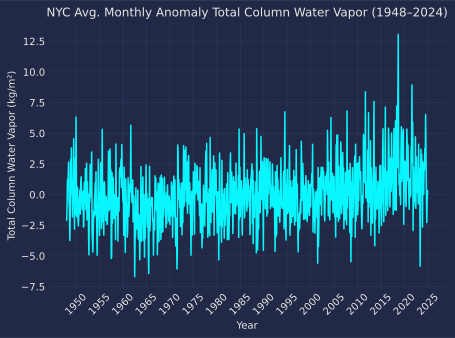

In [64]:
fig = plt.figure()
tcwv_nyc_monthly_anom.plot()
plt.ylabel("Total Column Water Vapor (kg/m²)")
plt.xlabel("Year")
plt.title("NYC Avg. Monthly Anomaly Total Column Water Vapor (1948–2024)")
# Set xticks to every 5 years
plt.xticks(
    np.arange(
        pd.to_datetime("1950-01-01"),
        pd.to_datetime("2026-01-01"),
        dtype="datetime64[Y]",
    )[::5],
    rotation=45,
)
plt.tight_layout()
plt.show()

In [66]:
x = np.arange(len(tcwv_nyc_monthly_anom.valid_time))
y = tcwv_nyc_monthly_anom.values

model = sm.GLSAR(y, sm.add_constant(x), rho=1)
res = model.iterative_fit()
print(res.summary())


                           GLSAR Regression Results                           
Dep. Variable:                      y   R-squared:                       0.062
Model:                          GLSAR   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     60.61
Date:                Mon, 24 Nov 2025   Prob (F-statistic):           1.86e-14
Time:                        17:10:32   Log-Likelihood:                -2071.1
No. Observations:                 923   AIC:                             4146.
Df Residuals:                     921   BIC:                             4156.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1038      0.164     -6.729      0.0

In [59]:
x = np.arange(len(tcwv_nyc_monthly_anom.valid_time))
y = tcwv_nyc_monthly_anom.values
model = sm.GLSAR(y, sm.add_constant(x), rho=1)
res = model.iterative_fit()
print(res.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      y   R-squared:                       0.062
Model:                          GLSAR   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     60.61
Date:                Mon, 24 Nov 2025   Prob (F-statistic):           1.86e-14
Time:                        16:52:04   Log-Likelihood:                -2071.1
No. Observations:                 923   AIC:                             4146.
Df Residuals:                     921   BIC:                             4156.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1038      0.164     -6.729      0.0